In [1]:
import numpy as np
import matplotlib.pyplot as plt
    

In [7]:
def get_probability():
    p1 = np.random.uniform()
    p2 = np.random.uniform(0,1-p1)
    p3 = 1- p1-p2
    return p1,p2,p3

In [3]:
def toss(P,N=1):
    p1,p2,p3 = P
    u = np.random.uniform(0,1,N)
    result = np.zeros(N)
    result[np.where(u<p1)[0]] = 1
    result[np.where(np.logical_and(u>=p1,u<p1+p2))] = 2
    result[np.where(u>=p1+p2)] =3
    return result

In [74]:
def get_coin_tossed(dice_A_result,dice_B_result,initial_seed = 0, outfrequency = 10):
    N = len(dice_A_result)# every frequncy results outpus, to decorrelate results
    result = np.zeros(N+1)
    result[0] = initial_seed
    output = np.zeros(int(1.*N/outfrequency))
    A_is_one = (dice_A_result ==1)
    A_is_two = (dice_A_result ==2)
    A_is_thr = (dice_A_result ==3)
    
    B_is_one = (dice_B_result== 1)
    B_is_two = (dice_B_result== 2)
    B_is_thr = (dice_B_result== 3)
    
    #(1,2)+ (1,3) + (2,3) is event1
    #(2,1)+ (3,1) + (3,2) is event2
    event1 =A_is_one*B_is_two + A_is_one*B_is_thr + A_is_two*B_is_thr
    event2 =B_is_one*A_is_two + B_is_one*A_is_thr + B_is_two*A_is_thr
    
    for i in range(N):
        if result[i]==0 :
            result[i+1] =0
            if event1[i]==1: #compound event1 occurs, we flip the coin
                result[i+1] = 1
        if result[i] ==1 :
            result[i+1] =1
            if event2[i] ==1:
                result[i+1] = 0 #compund event2 occurs, we flip the coin
        if ((i+1)%outfrequency==0):
            output[int((i+1)/outfrequency)-1] = result[i+1]
    #np.random.shuffle(result)
    return output
                
            

In [102]:
def get_uniform(M,P=None, outfrequency=30):
    if P==None:
        P = get_probability()
    N = 32*M*outfrequency
    diceA = toss(P,N)
    diceB = toss(P,N)
    coin_result = get_coin_tossed(diceA,diceB,outfrequency=outfrequency)
    coin_result = np.reshape(coin_result,(M,32))
    binary_vector = 1<< np.arange(32)[::-1]
    result = coin_result.dot(binary_vector)
    result = result.flatten()
    result = result/(1.*2**32)
    return result   
        

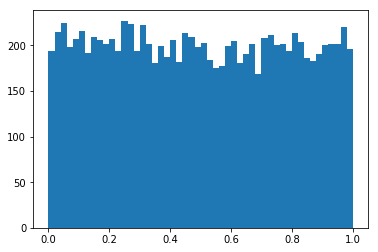

In [103]:
U = get_uniform(10000)
plt.hist(U,bins=50)
plt.show()

In [104]:
def get_Gaussian(M,outfrequency=15):
    N = 32*M*outfrequency/2
    P = get_probability()
    p=get_uniform(M,P,outfrequency=outfrequency)
    q=get_uniform(M,P,outfrequency=outfrequency)
    theta = 2*np.pi*p
    r = np.sqrt(-2*np.log(q))
    o1 = r*np.cos(theta)
    o2 = r*np.sin(theta)
    output = np.hstack([o1,o2])
    return output
    

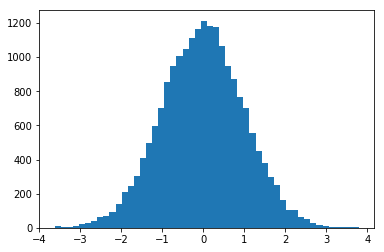

In [105]:
G = get_Gaussian(10000)
plt.hist(G,bins=50)
plt.show()

In [ ]:
def get_matrix_element(N):
    P = get_probability()
    result1 = toss(P,N)  # N times of toss of dice A
    result2 = toss(P,N)  # N times of toss of dice B
    A_is_one = (result1 ==1)
    A_is_two = (result1 ==2)
    A_is_thr = (result1 ==3)
    
    B_is_one = (result2== 1)
    B_is_two = (result2== 2)
    B_is_thr = (result2== 3)
    
    #(1,2)+ (1,3) + (2,3) is event1
    #(2,1)+ (3,1) + (3,2) is event2
    N_event1 = np.sum(A_is_one*B_is_two + A_is_one*B_is_three + A_is_two*B_is_three)
    N_evetn2 = np.sum(B_is_one*A_is_two + B_is_one*A_is_three + B_is_two*A_is_three)
    
    P12 = 1.*N_event1/N
    P21 = 1.*N_event2/N
    
    P11 = 1- P12
    P22 = 1 - P21
    
    matrix = np.array([[P11,P12],
                      \[P21,P22]])
    
    return matrix

def get_coin_tossed(transition_matrix,N,initial_seed=0):
    result = np.zeros((N+1))
    U = np.random.uniform(N)
    P11 = matrix[0,0]
    for i in range(N):
        if U[i]<P11:
            result[i+1] = result[i]
        else:
            result[i+1] = (result[i]*2-1)*(-1)
            result[i+1] = result[i+1]/2.0+0.5
    return result[1:]
    